### 강의에서 소개된 파이썬 주요 기능
- numpy.ndarray.flatten: https://numpy.org/doc/stable/reference/generated/numpy.ndarray.flatten.html
- matplotlib.pyplot.text: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.text.html

### 위치 추적 데이터 준비

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from src.plot_utils import draw_pitch

##### (1) 홈팀 데이터 불러오기 

In [3]:
match_id = 1
home_file = f'data_metrica/Sample_Game_{match_id}/Sample_Game_{match_id}_RawTrackingData_Home_Team.csv'
home_traces = pd.read_csv(home_file, header=[0, 1, 2])
home_traces

Unnamed: 0_level_0 Unnamed: 1_level_0 Unnamed: 2_level_0     Home  \
       Unnamed: 0_level_1 Unnamed: 1_level_1 Unnamed: 2_level_1       11   
                   Period              Frame           Time [s] Player11   
0                       1                  1               0.04  0.00082   
1                       1                  2               0.08  0.00096   
2                       1                  3               0.12  0.00114   
3                       1                  4               0.16  0.00121   
4                       1                  5               0.20  0.00129   
...                   ...                ...                ...      ...   
145001                  2             145002            5800.08  0.90614   
145002                  2             145003            5800.12  0.90550   
145003                  2             145004            5800.16  0.90492   
145004                  2             145005            5800.20  0.90456   
145005                  2             145006            5800.24  0.90456   

       Unnamed: 4_level_0     Home Unnamed: 6_level_0     Home  \
       Unnamed: 4_level_1        1 Unnamed: 6_level_1        2   
       Unnamed: 4_level_2  Player1 Unnamed: 6_level_2  Player2   
0                 0.48238  0.32648            0.65322  0.33701   
1                 0.48238  0.32648            0.65322  0.33701   
2                 0.48238  0.32648            0.65322  0.33701   
3                 0.48238  0.32622            0.65317  0.33687   
4                 0.48238  0.32597            0.65269  0.33664   
...                   ...      ...                ...      ...   
145001            0.45355      NaN                NaN  0.34157   
145002            0.45355      NaN                NaN  0.34127   
145003            0.45355      NaN                NaN  0.34089   
145004            0.45356      NaN                NaN  0.34056   
145005            0.45356      NaN                NaN  0.33996   

       Unnamed: 8_level_0     Home  ...          Unnamed: 24_level_0     Home  \
       Unnamed: 8_level_1        3  ...       10 Unnamed: 24_level_1       12   
       Unnamed: 8_level_2  Player3  ... Player10 Unnamed: 24_level_2 Player12   
0                 0.48863  0.30927  ...  0.55243             0.43269      NaN   
1                 0.48863  0.30927  ...  0.55243             0.43269      NaN   
2                 0.48863  0.30927  ...  0.55243             0.43269      NaN   
3                 0.48988  0.30944  ...  0.55236             0.43313      NaN   
4                 0.49018  0.30948  ...  0.55202             0.43311      NaN   
...                   ...      ...  ...      ...                 ...      ...   
145001            0.64598  0.31228  ...      NaN                 NaN  0.30044   
145002            0.64583  0.31230  ...      NaN                 NaN  0.30044   
145003            0.64569  0.31214  ...      NaN                 NaN  0.30044   
145004            0.64552  0.31171  ...      NaN                 NaN  0.30044   
145005            0.64544  0.31122  ...      NaN                 NaN  0.30044   

       Unnamed: 26_level_0     Home Unnamed: 28_level_0     Home  \
       Unnamed: 26_level_1       13 Unnamed: 28_level_1       14   
       Unnamed: 26_level_2 Player13 Unnamed: 28_level_2 Player14   
0                      NaN      NaN                 NaN      NaN   
1                      NaN      NaN                 NaN      NaN   
2                      NaN      NaN                 NaN      NaN   
3                      NaN      NaN                 NaN      NaN   
4                      NaN      NaN                 NaN      NaN   
...                    ...      ...                 ...      ...   
145001             0.68311  0.33644             0.65390  0.34157   
145002             0.68311  0.33656             0.65398  0.34127   
145003             0.68311  0.33637             0.65366  0.34089   
145004             0.68311  0.33615             0.65317  0.34056  

##### (2) 홈팀 데이터 열 이름 정리

In [4]:
players = [c[2] for c in home_traces.columns[3:-2:2]]
trace_cols = np.array([[f'H{int(p[6:]):02d}_x', f'H{int(p[6:]):02d}_y'] for p in players])
trace_cols

array([['H11_x', 'H11_y'],
       ['H01_x', 'H01_y'],
       ['H02_x', 'H02_y'],
       ['H03_x', 'H03_y'],
       ['H04_x', 'H04_y'],
       ['H05_x', 'H05_y'],
       ['H06_x', 'H06_y'],
       ['H07_x', 'H07_y'],
       ['H08_x', 'H08_y'],
       ['H09_x', 'H09_y'],
       ['H10_x', 'H10_y'],
       ['H12_x', 'H12_y'],
       ['H13_x', 'H13_y'],
       ['H14_x', 'H14_y']], dtype='<U5')

In [5]:
trace_cols.flatten()

array(['H11_x', 'H11_y', 'H01_x', 'H01_y', 'H02_x', 'H02_y', 'H03_x',
       'H03_y', 'H04_x', 'H04_y', 'H05_x', 'H05_y', 'H06_x', 'H06_y',
       'H07_x', 'H07_y', 'H08_x', 'H08_y', 'H09_x', 'H09_y', 'H10_x',
       'H10_y', 'H12_x', 'H12_y', 'H13_x', 'H13_y', 'H14_x', 'H14_y'],
      dtype='<U5')

In [6]:
trace_cols = np.array([[f'H{int(p[6:]):02d}_x', f'H{int(p[6:]):02d}_y'] for p in players]).flatten().tolist()
home_traces.columns = ['period', 'frame', 'time'] + trace_cols + ['ball_x', 'ball_y']

home_traces = home_traces.set_index('frame').astype(float)
home_traces['period'] = home_traces['period'].astype(int)
home_traces

,period,time,H11_x,H11_y,H01_x,H01_y,H02_x,H02_y,H03_x,H03_y,...,H10_x,H10_y,H12_x,H12_y,H13_x,H13_y,H14_x,H14_y,ball_x,ball_y
frame,,,,,,,,,,,,,,,,,,,,,
1,1,0.04,0.00082,0.48238,0.32648,0.65322,0.33701,0.48863,0.30927,0.35529,...,0.55243,0.43269,NaN,NaN,NaN,NaN,NaN,NaN,0.45472,0.38709
2,1,0.08,0.00096,0.48238,0.32648,0.65322,0.33701,0.48863,0.30927,0.35529,...,0.55243,0.43269,NaN,NaN,NaN,NaN,NaN,NaN,0.49645,0.40656
3,1,0.12,0.00114,0.48238,0.32648,0.65322,0.33701,0.48863,0.30927,0.35529,...,0.55243,0.43269,NaN,NaN,NaN,NaN,NaN,NaN,0.53716,0.42556
4,1,0.16,0.00121,0.48238,0.32622,0.65317,0.33687,0.48988,0.30944,0.35554,...,0.55236,0.43313,NaN,NaN,NaN,NaN,NaN,NaN,0.55346,0.42231
5,1,0.20,0.00129,0.48238,0.32597,0.65269,0.33664,0.49018,0.30948,0.35528,...,0.55202,0.43311,NaN,NaN,NaN,NaN,NaN,NaN,0.55512,0.40570
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145002,2,5800.08,0.90614,0.45355,NaN,NaN,0.34157,0.64598,0.31228,0.67513,...,NaN,NaN,0.30044,0.68311,0.33644,0.65390,0.34157,0.64598,NaN,NaN
145003,2,5800.12,0.90550,0.45355,NaN,NaN,0.34127,0.64583,0.31230,0.67529,...,NaN,NaN,0.30044,0.68311,0.33656,0.65398,0.34127,0.64583,NaN,NaN
145004,2,5800.16,0.90492,0.45355,NaN,NaN,0.34089,0.64569,0.31214,0.67501,...,NaN,NaN,0.30044,0.68311,0.33637,0.65366,0.34089,0.64569,NaN,NaN


##### (3) 원정팀 데이터 불러오기 및 열 이름 정리

In [7]:
away_file = f'data_metrica/Sample_Game_{match_id}/Sample_Game_{match_id}_RawTrackingData_Away_Team.csv'
away_traces = pd.read_csv(away_file, header=[0, 1, 2])

players = [c[2] for c in away_traces.columns[3:-2:2]]
trace_cols = np.array([[f'A{int(p[6:]):02d}_x', f'A{int(p[6:]):02d}_y'] for p in players]).flatten().tolist()
away_traces.columns = ['period', 'frame', 'time'] + trace_cols + ['ball_x', 'ball_y']

away_traces = away_traces.set_index('frame').astype(float)
away_traces['period'] = away_traces['period'].astype(int)
away_traces

,period,time,A25_x,A25_y,A15_x,A15_y,A16_x,A16_y,A17_x,A17_y,...,A24_x,A24_y,A26_x,A26_y,A27_x,A27_y,A28_x,A28_y,ball_x,ball_y
frame,,,,,,,,,,,,,,,,,,,,,
1,1,0.04,0.90509,0.47462,0.58393,0.20794,0.67658,0.46710,0.67310,0.76476,...,0.37833,0.27383,NaN,NaN,NaN,NaN,NaN,NaN,0.45472,0.38709
2,1,0.08,0.90494,0.47462,0.58393,0.20794,0.67658,0.46710,0.67310,0.76476,...,0.37833,0.27383,NaN,NaN,NaN,NaN,NaN,NaN,0.49645,0.40656
3,1,0.12,0.90434,0.47463,0.58393,0.20794,0.67658,0.46710,0.67310,0.76476,...,0.37833,0.27383,NaN,NaN,NaN,NaN,NaN,NaN,0.53716,0.42556
4,1,0.16,0.90377,0.47463,0.58351,0.20868,0.67640,0.46762,0.67279,0.76542,...,0.37756,0.27473,NaN,NaN,NaN,NaN,NaN,NaN,0.55346,0.42231
5,1,0.20,0.90324,0.47464,0.58291,0.21039,0.67599,0.46769,0.67253,0.76564,...,0.37663,0.27543,NaN,NaN,NaN,NaN,NaN,NaN,0.55512,0.40570
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145002,2,5800.08,0.12564,0.55386,0.17876,0.56826,0.25818,0.59952,0.09880,0.92391,...,NaN,NaN,0.35600,0.55371,0.19836,0.45137,0.21798,0.81079,NaN,NaN
145003,2,5800.12,0.12564,0.55386,0.17838,0.56727,0.25799,0.59999,0.09880,0.92391,...,NaN,NaN,0.35583,0.55283,0.19831,0.45182,0.21798,0.81079,NaN,NaN
145004,2,5800.16,0.12564,0.55386,0.17792,0.56682,0.25757,0.60019,0.09880,0.92391,...,NaN,NaN,0.35561,0.55254,0.19805,0.45200,0.21798,0.81079,NaN,NaN


##### (4) 양팀 데이터 결합

In [8]:
cols = home_traces.columns[:-2].tolist() + away_traces.columns[2:].tolist()
traces = pd.merge(home_traces, away_traces)[cols]
traces.index = home_traces.index.astype(int)

x_cols = [c for c in traces.columns if c.endswith('_x')]
y_cols = [c for c in traces.columns if c.endswith('_y')]
traces.loc[traces['period'] == 2, x_cols + y_cols] = 1 - traces.loc[traces['period'] == 2, x_cols + y_cols]
traces[x_cols] *= 104
traces[y_cols] *= 68

traces

,period,time,H11_x,H11_y,H01_x,H01_y,H02_x,H02_y,H03_x,H03_y,...,A24_x,A24_y,A26_x,A26_y,A27_x,A27_y,A28_x,A28_y,ball_x,ball_y
frame,,,,,,,,,,,,,,,,,,,,,
1,1,0.04,0.08528,32.80184,33.95392,44.41896,35.04904,33.22684,32.16408,24.15972,...,39.34632,18.62044,NaN,NaN,NaN,NaN,NaN,NaN,47.29088,26.32212
2,1,0.08,0.09984,32.80184,33.95392,44.41896,35.04904,33.22684,32.16408,24.15972,...,39.34632,18.62044,NaN,NaN,NaN,NaN,NaN,NaN,51.63080,27.64608
3,1,0.12,0.11856,32.80184,33.95392,44.41896,35.04904,33.22684,32.16408,24.15972,...,39.34632,18.62044,NaN,NaN,NaN,NaN,NaN,NaN,55.86464,28.93808
4,1,0.16,0.12584,32.80184,33.92688,44.41556,35.03448,33.31184,32.18176,24.17672,...,39.26624,18.68164,NaN,NaN,NaN,NaN,NaN,NaN,57.55984,28.71708
5,1,0.20,0.13416,32.80184,33.90088,44.38292,35.01056,33.33224,32.18592,24.15904,...,39.16952,18.72924,NaN,NaN,NaN,NaN,NaN,NaN,57.73248,27.58760
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145002,2,5800.08,9.76144,37.15860,NaN,NaN,68.47672,24.07336,71.52288,22.09116,...,NaN,NaN,66.97600,30.34772,83.37056,37.30684,81.33008,12.86628,NaN,NaN
145003,2,5800.12,9.82800,37.15860,NaN,NaN,68.50792,24.08356,71.52080,22.08028,...,NaN,NaN,66.99368,30.40756,83.37576,37.27624,81.33008,12.86628,NaN,NaN
145004,2,5800.16,9.88832,37.15860,NaN,NaN,68.54744,24.09308,71.53744,22.09932,...,NaN,NaN,67.01656,30.42728,83.40280,37.26400,81.33008,12.86628,NaN,NaN


### 이벤트 데이터 결합

##### (1) 이벤트 데이터 불러오기

In [9]:
event_file = f'data_metrica/Sample_Game_{match_id}/Sample_Game_{match_id}_RawEventsData.csv'
events = pd.read_csv(event_file, header=0)
events

,Team,Type,Subtype,Period,Start Frame,Start Time [s],End Frame,End Time [s],From,To,Start X,Start Y,End X,End Y
0,Away,SET PIECE,KICK OFF,1,1,0.04,0,0.00,Player19,NaN,NaN,NaN,NaN,NaN
1,Away,PASS,NaN,1,1,0.04,3,0.12,Player19,Player21,0.45,0.39,0.55,0.43
2,Away,PASS,NaN,1,3,0.12,17,0.68,Player21,Player15,0.55,0.43,0.58,0.21
3,Away,PASS,NaN,1,45,1.80,61,2.44,Player15,Player19,0.55,0.19,0.45,0.31
4,Away,PASS,NaN,1,77,3.08,96,3.84,Player19,Player21,0.45,0.32,0.49,0.47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1740,Home,PASS,NaN,2,143361,5734.44,143483,5739.32,Player12,Player13,0.60,0.33,0.19,0.95
1741,Home,PASS,NaN,2,143578,5743.12,143593,5743.72,Player13,Player4,0.09,0.88,0.14,0.69
1742,Home,BALL LOST,INTERCEPTION,2,143598,5743.92,143618,5744.72,Player4,NaN,0.13,0.69,0.07,0.61
1743,Away,RECOVERY,BLOCKED,2,143617,5744.68,143617,5744.68,Player16,NaN,0.05,0.62,NaN,NaN


##### (2) Subtype NaN 값 채우기

In [10]:
events[['Type', 'Subtype']].drop_duplicates().sort_values(['Type', 'Subtype'], ignore_index=True)[-40:]

,Type,Subtype
29,CHALLENGE,DRIBBLE-WON
30,CHALLENGE,GROUND
31,CHALLENGE,GROUND-ADVANTAGE-LOST
32,CHALLENGE,GROUND-FAULT-LOST
33,CHALLENGE,GROUND-FAULT-WON
34,CHALLENGE,GROUND-LOST
35,CHALLENGE,GROUND-WON
36,CHALLENGE,TACKLE-ADVANTAGE-LOST
37,CHALLENGE,TACKLE-ADVANTAGE-WON
38,CHALLENGE,TACKLE-FAULT-LOST


In [14]:
events.loc[events['Subtype'].isna(), 'Subtype'] = events.loc[events['Subtype'].isna(), 'Type']

##### (3) 위치 추적 및 이벤트 데이터 결합

In [15]:
for i, event in events.iterrows():
    start_frame = event['Start Frame']
    end_frame = event['End Frame']
    traces.loc[start_frame:end_frame-1, 'event_player'] = event['From']
    traces.loc[start_frame:end_frame-1, 'event_type'] = event['Type']
    traces.loc[start_frame:end_frame-1, 'event_subtype'] = event['Subtype']

traces

,period,time,H11_x,H11_y,H01_x,H01_y,H02_x,H02_y,H03_x,H03_y,...,A26_y,A27_x,A27_y,A28_x,A28_y,ball_x,ball_y,event_player,event_type,event_subtype
frame,,,,,,,,,,,,,,,,,,,,,
1,1,0.04,0.08528,32.80184,33.95392,44.41896,35.04904,33.22684,32.16408,24.15972,...,NaN,NaN,NaN,NaN,NaN,47.29088,26.32212,Player19,PASS,PASS
2,1,0.08,0.09984,32.80184,33.95392,44.41896,35.04904,33.22684,32.16408,24.15972,...,NaN,NaN,NaN,NaN,NaN,51.63080,27.64608,Player19,PASS,PASS
3,1,0.12,0.11856,32.80184,33.95392,44.41896,35.04904,33.22684,32.16408,24.15972,...,NaN,NaN,NaN,NaN,NaN,55.86464,28.93808,Player21,PASS,PASS
4,1,0.16,0.12584,32.80184,33.92688,44.41556,35.03448,33.31184,32.18176,24.17672,...,NaN,NaN,NaN,NaN,NaN,57.55984,28.71708,Player21,PASS,PASS
5,1,0.20,0.13416,32.80184,33.90088,44.38292,35.01056,33.33224,32.18592,24.15904,...,NaN,NaN,NaN,NaN,NaN,57.73248,27.58760,Player21,PASS,PASS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145002,2,5800.08,9.76144,37.15860,NaN,NaN,68.47672,24.07336,71.52288,22.09116,...,30.34772,83.37056,37.30684,81.33008,12.86628,NaN,NaN,NaN,NaN,NaN
145003,2,5800.12,9.82800,37.15860,NaN,NaN,68.50792,24.08356,71.52080,22.08028,...,30.40756,83.37576,37.27624,81.33008,12.86628,NaN,NaN,NaN,NaN,NaN
145004,2,5800.16,9.88832,37.15860,NaN,NaN,68.54744,24.09308,71.53744,22.09932,...,30.42728,83.40280,37.26400,81.33008,12.86628,NaN,NaN,NaN,NaN,NaN


##### (4) 결합 데이터 시점별 시각화

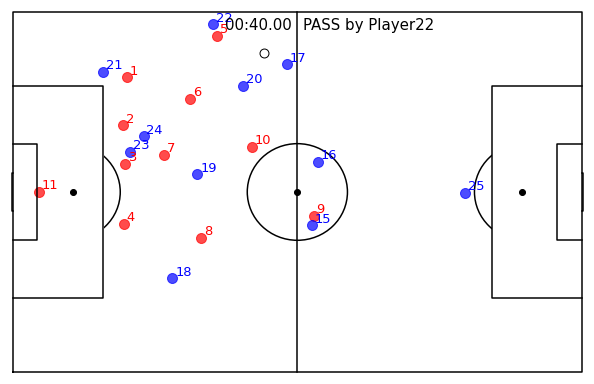

In [13]:
frame = 1000
data = traces.loc[frame]

fig, ax = draw_pitch(pitch='white', line='black')

for team, color in zip(['H', 'A'], ['r', 'b']):
    x_cols = [c for c in data.keys() if c.startswith(team) and c.endswith('_x')]
    y_cols = [c for c in data.keys() if c.startswith(team) and c.endswith('_y')]
    ax.scatter(data[x_cols], data[y_cols], s=100, c=color, alpha=0.7)
    
    for x, y in zip(x_cols, y_cols):
        if not (np.isnan(data[x]) or np.isnan(data[y])):
            ax.text(data[x] + 0.5, data[y] + 0.5, int(x[1:3]), fontsize=13, color=color)

ax.scatter(data['ball_x'], data['ball_y'], s=80, color='w', edgecolors='k')

time_text = f"{int(data['time'] // 60):02d}:{data['time'] % 60:05.2f}"
if not pd.isnull(data['event_subtype']):
    event_text = f"{data['event_subtype']} by {data['event_player']}" 
else:
    event_text = ''
ax.text(51, 67, time_text, fontsize=15, ha='right', va='top')
ax.text(53, 67, event_text, fontsize=15, ha='left', va='top')
    
plt.show()

##### (5) 결합 데이터 저장

In [18]:
traces.to_csv('data_metrica/Sample_Game_1/Sample_Game_1_IntegratedData.csv')